In [2]:
from spectrumtools.spectrum import Spectrum, Source
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
a = Spectrum("data/fake_data.csv")
s1 = Source(3000, [605.4, 1392.42], [0.333, 0.666])
s2 = Source(2000, [1210.8], [1.0])
print(a.calibrate((s1,s2)))
#print(a.find_peaks())
a.show_histogram("a")

Energy(c) = 0.0c^2 + 0.5987c + 5.251
[2.02272644e-06 5.98729048e-01 5.25099783e+00]


In [3]:

# Lab0.h5
# Source: Cs-137

# invert pulses false, 500 trigger delay, 170 trigger threshold
f_name = '../data/co57.h5'
f_data = h5py.File(f_name,'r')
raw_data0 = f_data['raw_data'][()]

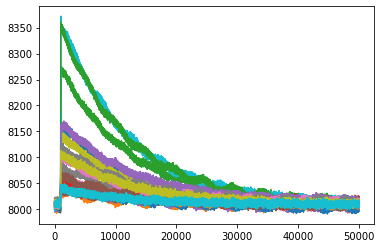

In [7]:
# plot all pulses
# last week
plt.figure()
for i in range(20,40):#len(raw_data0)):
    plt.plot(raw_data0[i])
plt.show()

116


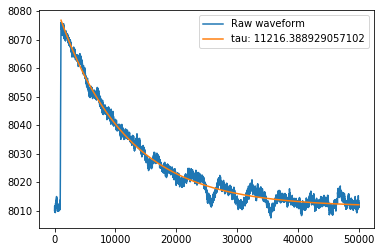

In [11]:
def exponential(t, a, tau, c):
    return a * np.exp(-t / tau) + c

def find_amplitude(waveform, width=20):
    # Calculate the baseline value by averaging the first 20 data points
    waveform = np.int64(waveform)
    baseline_value = np.convolve(waveform[0:width], np.ones(width), 'valid') / width
    
    # Make a smooth version of the c
    waveform = np.convolve(waveform, np.ones(width), 'valid') / width
    max_location = np.argmax(waveform)
    
    
    # Determine Tau
    n = np.arange(0, len(waveform))
    decay_indices = n[max_location:-1]
    decay_indices_norm = (decay_indices - decay_indices[0])/(decay_indices[-1] - decay_indices[0])
    c_0 = waveform[-1]
    tau_0 = 1
    a_0 = (waveform[0] - waveform[-1])
    popt, pcov = curve_fit(exponential, decay_indices_norm, waveform[decay_indices], p0=(a_0, tau_0, c_0))
    a, tau, c = popt
    tau *= max(n)
    
    
    start_time = 950
    #print(max_location)
    k = max_location-start_time
    print(k)
    l = 1200
    
    
    #print(tau)
    s = np.zeros(len(waveform))
    for i in range(k+l, max(n)-(k+l)):
        j = i+k+l
        d_kl = waveform[j]-waveform[j-k]-waveform[j-l]+waveform[j-k-l]
        #print(d_kl)
        s[i] = s[i-1]*(1+1/tau) + d_kl
    
    plt.figure()
    plt.plot(waveform, label="Raw waveform")
    #plt.plot(s, label="Trapezoid")
    plt.plot(decay_indices, exponential(decay_indices_norm, a, tau/max(n), c), label="tau: {0}".format(tau))
    #plt.xlim(800,1200)
    #plt.ylim(1,1000000)
    plt.legend()
    plt.show()
    return


# plot single pulse
find_amplitude(raw_data0[1])